# Extracts for data visualization
## Partials from my work on the final project Microsoft Professional Program Data Science

Please be aware that the portion represented in this notebook are extracts, reduced to the required codes to generate the graphics I posted originally on the edX course discussion forum. This represents only a small portion of the exploration and work I did with this particularly interesting dataset.

I did the original work in spyder, but moved it over to an ipython notebook for ease of annotation and presentation.

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import datetime as DT
import pandas as pd
import numpy as np
import scipy as sc
import seaborn as sns


First let's load the datasets

In [2]:
Sales = pd.read_csv('Data/AWSales.csv', header = 0, encoding='utf_8')
Customer = pd.read_csv('Data/AWCustomers.csv', header = 0, encoding='utf_8')


Do some pre-processing

In [3]:
dualCID = [24334, 23192, 13385, 21647, 26829, 23770]
Sales.drop_duplicates(subset='CustomerID', inplace = True)
Customer = Customer.sort_values('LastUpdated').drop_duplicates(subset='CustomerID', keep='last')
Sales['SaCuID'] = Sales['CustomerID']
Customer['CuCuID'] = Customer['CustomerID']

Join the two datasets to form one that includes the target values for the classification problem and the regression problem.
I will not be going there, as this is not part of this notebook, I do need the combined dataset for the visualizations.

In [4]:
Joint = Customer.set_index('CustomerID').join(Sales.set_index('CustomerID'),  how='right')
numFeat = ['NumberCarsOwned', 'NumberChildrenAtHome', 'TotalChildren', 'YearlyIncome', 'AvgMonthSpend']

Create an additional feature 'age' that calculates today's age of the customer form the Birth Date in the dataset

In [5]:
Joint['BirthDate'] = pd.to_datetime(Joint['BirthDate'])
now = pd.Timestamp(DT.datetime.now())
Joint['age'] = (now - Joint['BirthDate']).astype('<m8[Y]').astype(int)

Some changes to the dataset I included at an earlier stage so I'll have to include them in here as well ;-)

In [6]:
Joint['Gender'] = np.where(Joint['Gender'] == 'M', 'Male', 'Female')

## And now the more interesting part:
creating the distinct sub-datasets for females, males 30-49 and males rest

In [7]:
male_30_50 = Joint[((Joint['Gender'] == 'Male') & (Joint['age'] >=30) & (Joint['age'] <= 49))].copy()
male_rest = Joint[((Joint['Gender'] == 'Male') & (Joint['age'] < 30))].append(Joint[((Joint['Gender'] == 'Male') & (Joint['age'] > 49))]).copy()
females = Joint[(Joint['Gender'] == 'Female')].copy()


Yeah, this dataset and the challenge you gave us really bugged me. I would guess I spend more than 100 hours trying different (some of them really exotic) approaches. From what I can see in the dataset, it was basically created in a first step around the occupations. Each occupation has it's own mean (approx. 31250, 56625, 8200, 107625, 133125), , and a narrow std (between 3200 and 3269). So I'd assume the datasets were created with the fixed amount an some noise around it:

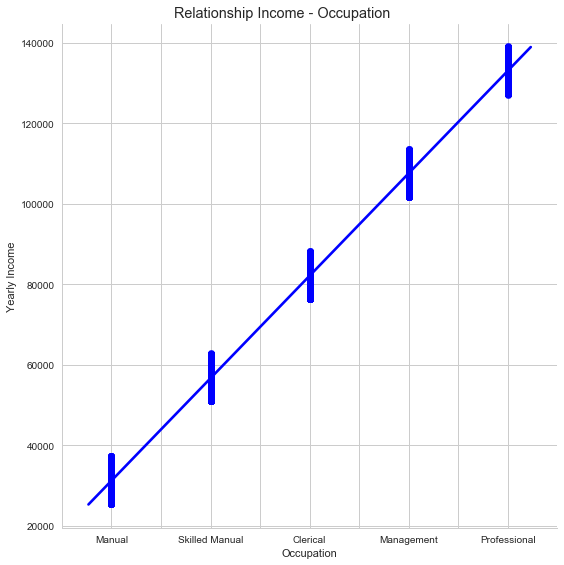

In [8]:
known_occupations = {'Manual':1, 'Skilled Manual':2, 'Clerical':3, 'Management':4, 'Professional':5}
sns.set_style('whitegrid')
df = Joint.copy()
#df['age'] = df['age'].apply(lambda x: x//10)
df.replace({'Occupation': known_occupations}, inplace=True)
plot = sns.lmplot('Occupation', 'YearlyIncome', data=df, palette='winter', size = 8, line_kws={'color': 'b'}, scatter_kws={'color': 'b'})
locs, labels = plt.xticks()
plt.xticks(locs, ['', 'Manual', '', 'Skilled Manual', '', 'Clerical', '', 'Management', '', 'Professional'])
plt.subplots_adjust(top=0.95)
plt.ylabel('Yearly Income')
plot.fig.suptitle('Relationship Income - Occupation')
plt.show()


Next, the male 30-49 group was roughly divided in half, and the avg monthly spend was increased by 8 bucks for one half (it might be a fluke or on purpose that the manual occupation group is largely exempt), so what we are seeing here are to roughly normal distributions on top of each other:

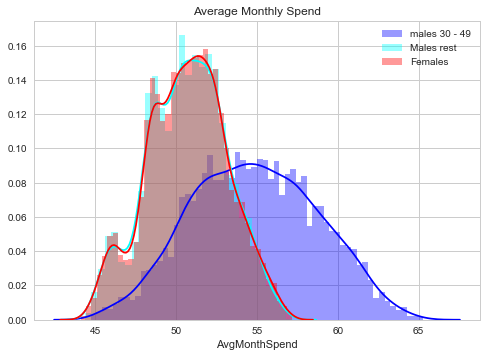

In [9]:
sns.set_style('whitegrid')
dist_plot = sns.distplot(male_30_50['AvgMonthSpend'], color = 'b', bins=60, label='males 30 - 49')
sns.distplot(male_rest['AvgMonthSpend'], color = 'cyan', label = 'Males rest')
sns.distplot(females['AvgMonthSpend'], color = 'red', label = 'Females')
dist_plot.set_title('Average Monthly Spend')
plt.legend()
plt.show()

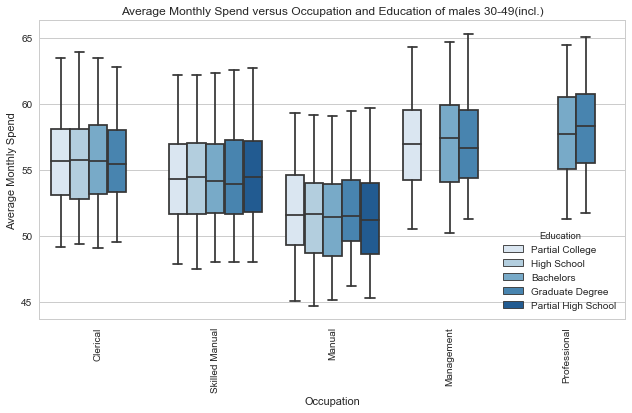

In [10]:
sns.set_style('whitegrid')
box_plot = sns.boxplot(x='Occupation', y='AvgMonthSpend', hue='Education', data=male_30_50, palette='Blues')
box_plot.set(xlabel='Occupation', ylabel='Average Monthly Spend')
box_plot.set_title('Average Monthly Spend versus Occupation and Education of males 30-49(incl.)')
locs, labels = plt.xticks()
box_plot.set_xticklabels(labels, fontsize='small')
box_plot.figure.set_size_inches(10.5, 5.5)
plt.xticks(rotation=90)
plt.show()


I am playing at the moment around with a python module that was designed to identify distribution overlays to see if I can separate the two distributions and see if I can achieve better results, but I doubt it.

The reason I doubt it is because the dataset in itself seems to be "noisy". No matter which approach anybody has taken and which model has been used, achieving around 80% accuracy seems to be the max.

So I am wondering, if there is a possibility to reverse-engineer the "creation" of the dataset to achieve better results, or if there is a point to it at all?

Next question for Graeme: Are you planning to re-use this challenge in the future? If no, could you please provide an introduction to the challenge and a description of the dataset? So we could use the report we put together as an example of work we did. I think together with your introduction, this would be a very good showcase and take-away from this program to get us all started in the data science world? What do you think?


A few final notes / questions from me: 
1. Has anybody achieved a significant higher result than around 80% precision?
2. Has anybody thrown bayesian algorithms at this data to see what comes out of it?
3. What were the most successful deep learning implementations?